# Actividad Integradora 2

Presentado por:
- David René Langarica Hernández - A01708936
- Juan Pablo Cabrera Quiroga - A01661090
- Santiago Rodríguez Murialdo - A01704109

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"

from file_operations import open_file, build_adjacency_matrix_from_file_lines
from forma_optima import *
from tsp import slime_mold, animate_route
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from main import centrales, nueva_central

In [21]:
file_structure = open_file("entrada1.txt")

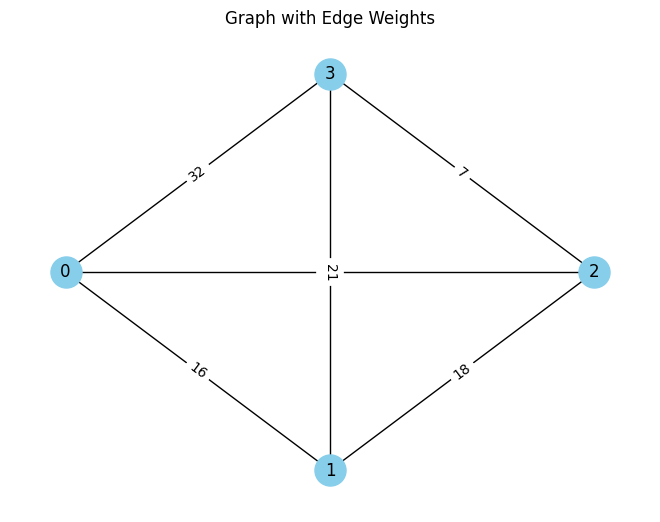

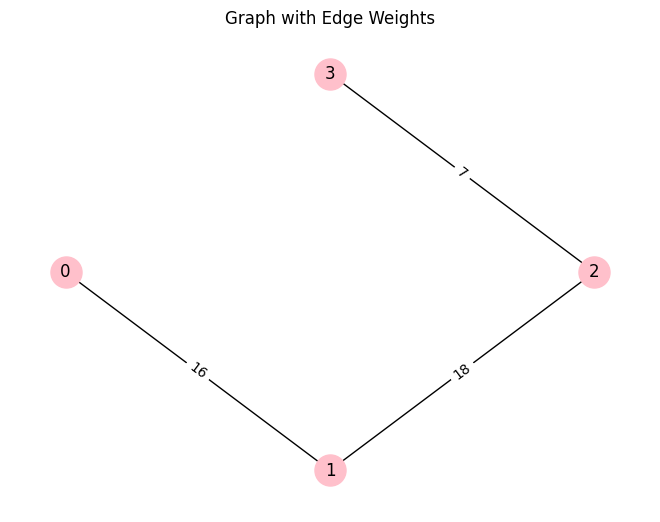

In [22]:
file_line_1 = file_structure[1]
adj_matrix_1 = build_adjacency_matrix_from_file_lines(file_line_1)
illustrate_graph_from_adjacency_matrix(adj_matrix_1)
mst_matrix = min_span_tree(adj_matrix_1)
illustrate_graph_from_mst(mst_matrix)

## Problema 2

### Problemática

Debido a que las ciudades apenas están entrando al mundo tecnológico, se requiere que alguien visite cada colonia para ir a dejar estados de cuenta físicos, publicidad, avisos y notificaciones impresos. por eso se quiere saber ¿cuál es la ruta más corta posible que visita cada colonia exactamente una vez y al finalizar regresa a la colonia origen?

### Algoritmo de moho de limo

Para resolver este problema se utilizó el algoritmo de moho de limo para experimentar con el y ver de qué manera puede resolver un problema de la misma índole que el TSP. 

Los pasos seguidos para resolver el problema fueron los siguientes:
1. Preparación de Datos:
- Tener una matriz de distancias entre los nodos.

2. Inicialización de la Matriz de Feromonas:
- Crear una matriz de feromonas con las mismas dimensiones que la matriz de distancias.
- Inicializar la matriz de feromonas, comúnmente con el inverso de las distancias.

3. Proceso Iterativo:

    En cada iteración del algoritmo, llevar a cabo los siguientes pasos:

    a. Evaporación de Feromonas:
    - Aplicar una tasa de evaporación a toda la matriz de feromonas para simular la pérdida natural de feromonas con el tiempo.

    b. Construcción de Soluciones:
    - Generar soluciones al TSP, posiblemente utilizando un enfoque probabilístico basado en las concentraciones de feromonas para elegir los caminos.

    c. Refuerzo de Feromonas:
    - Identificar las rutas más cortas o prometedoras encontradas en la iteración.
    - Reforzar las feromonas en los caminos que forman parte de estas rutas, aumentando la cantidad de feromonas de manera inversamente proporcional a la longitud de la ruta.

<!--  -->
4. Criterio de Terminación:
- Definir un criterio de terminación para el algoritmo, como un número fijo de iteraciones, una convergencia hacia una solución, o un límite de tiempo.

5. Selección de la Mejor Solución:
- Al finalizar el proceso iterativo, elegir la mejor solución encontrada, que normalmente será la ruta más corta descubierta.

Camino más corto: A--->B--->C--->D--->A
Distancia: 73 km



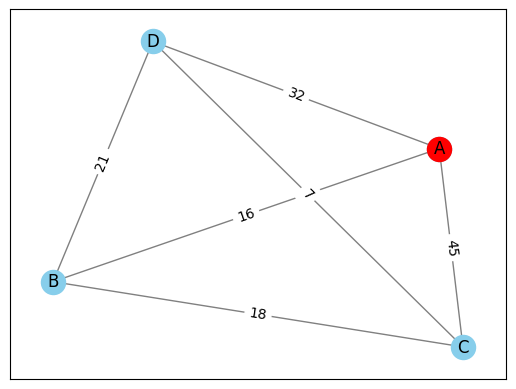

In [23]:
route, distance = slime_mold(adj_matrix_1)

print("Camino más corto:", end=" ")
for i in range(len(route) - 1):
    print(route[i], end="--->")
print(route[-1])
print(f"Distancia: {distance} km", end="\n\n")

animate_route(route, adj_matrix_1)

### Algoritmo empleado

Para este problema se decidió utilizar un algoritmo basado en la teoría dada por BBC Mundo (2021) con relación al comportamiento del moho de limo. Este algoritmo se basa en la idea de que el moho de limo se mueve en busca de comida, y cuando encuentra comida, deja un rastro de feromonas para que otros mohos de limo puedan seguirlo.

Partiendo de esta idea, con base en la naturaleza del problema (similar con el problema del viajante - TSP), se decidió emplear la idea de este algoritmo y usar una implementación propia para resolver el problema.

Ahora bien, cabe mencionar que este algoritmo es una aproximación heurística, lo que quiere decir que no necesariamente va a encontrar la solución óptima, pero si una solución que se acerque a ella. Y de esto deriva la idea de tenerle que definir un número de iteraciones para que encuentre la mejor solución posible.

En el caso de solo ponerle 1 iteración, notamos que este tenía un comportamiento muy similar a un algoritmo voraz, en donde la solución que encontraba era muy cercana a la solución óptima, pero no la mejor ya que era la primera que encontraba. Por lo que se decidió ponerle 10 iteraciones para que pudiera encontrar una solución más cercana a la óptima y así quedarse con esa solución.

Es por lo cuál que el algoritmo tiene una complejidad en su función principal de O(i * n^2), donde i es el número de iteraciones y n es el número de nodos. Esto se debe a los ciclos anidados sobre las iteraciones y los nodos en la matriz de feromonas. Con esto es notable que la complejidad del algoritmo es muy alta, pero se puede reducir si se le pone un número de iteraciones fijo, como en este caso.

Cómo área de mejora se podría optimizar el algoritmo para que no tenga que hacer tantas iteraciones, pero que siga encontrando soluciones cercanas a la óptima. Esto se podría lograr con un algoritmo genético, en donde se puedan generar soluciones aleatorias y que se vayan mutando para encontrar la mejor solución posible.


## Problema 4

### Problemática
Teniendo en cuenta la ubicación geográfica de varias "centrales" a las que se pueden conectar nuevas casas, la empresa quiere contar con una forma de decidir, dada una nueva contratación del servicio, cuál es la central más cercana geográficamente a esa nueva contratación. No necesariamente hay una central por cada colonia. Se pueden tener colonias sin central, y colonias con más de una central.

1. Preparación de Datos:

- Disponer de una lista de coordenadas para las centrales existentes y las coordenadas de la nueva central.

2. Cálculo de Distancias:

- Utilizar una función para calcular la distancia euclidiana entre dos puntos. Esto implica aplicar la fórmula de distancia euclidiana a cada par de coordenadas (cada central existente y la nueva central).

3. Búsqueda de la Central Más Cercana:

- Inicializar variables para almacenar la central más cercana y la distancia mínima encontrada.

- Recorrer la lista de centrales existentes y calcular la distancia de cada una a la nueva central.

- Comparar cada distancia calculada con la distancia mínima actual. Si una distancia calculada es menor que la distancia mínima actual, actualizar la distancia mínima y la central más cercana.

4. Criterio de Terminación:

- El proceso termina una vez que todas las centrales han sido comparadas con la nueva central.

5. Selección de la Mejor Solución:

- Después de recorrer todas las centrales existentes, seleccionar la central que tiene la menor distancia a la nueva central como la mejor solución.
Este proceso garantiza que se encuentre la central más cercana a la nueva ubicación, utilizando un enfoque directo y eficiente basado en el cálculo de distancias euclidianas y la comparación simple para determinar la menor distancia.


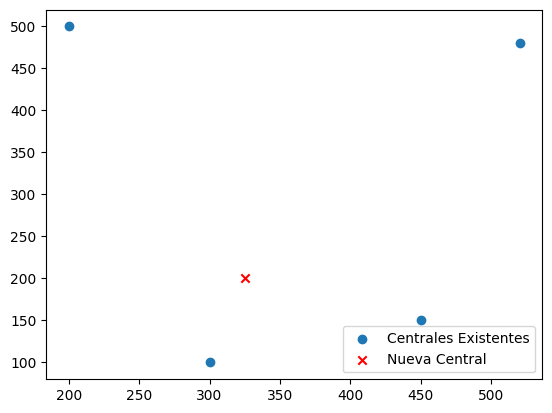

In [25]:
def animate_central_search(centrales, nueva_central, central_cercana=None):
    fig, ax = plt.subplots()
    ax.scatter(*zip(*centrales), marker='o', label='Centrales Existentes')
    ax.scatter(*nueva_central, marker='x', color='red', label='Nueva Central')

    if central_cercana is not None:
        ax.scatter(*central_cercana, marker='*',
                   color='green', label='Central Más Cercana')
        
    plt.legend()
    plt.show()


animate_central_search(centrales, nueva_central)

### Solución

La solución propuesta para este problema emplea dos funciones clave: calcular_distancia y encontrar_central_mas_cercana. La primera función calcula la distancia euclidiana entre dos puntos dados en un plano 2D, utilizando la fórmula estándar que implica calcular la raíz cuadrada de la suma de los cuadrados de las diferencias en las coordenadas x e y. La segunda función utiliza esta capacidad para identificar la central más cercana a una nueva ubicación. Itera sobre una lista de centrales existentes, calculando la distancia de cada una a la nueva ubicación, y selecciona la central con la menor distancia calculada, proporcionando así la central más cercana y la distancia a ella.

### Criterios de selección

Los criterios de selección para la central más cercana se basan puramente en la distancia euclidiana. La central seleccionada es aquella cuya distancia a la nueva ubicación es la menor entre todas las centrales disponibles. Este enfoque garantiza una selección objetiva y cuantificable, basada exclusivamente en la proximidad geográfica.

### Complejidad computacional

La complejidad computacional de la función calcular_distancia es O(1), ya que realiza un cálculo directo sin bucles o recursión. Por otro lado, la complejidad de encontrar_central_mas_cercana es O(n), donde n es el número de centrales en la lista proporcionada. Esto se debe a que la función debe recorrer cada central una vez para calcular y comparar las distancias.

## Conclusiones

### Juan Pablo

Este enfoque proporciona una solución eficiente y precisa para el problema de encontrar la central más cercana a una ubicación dada. La combinación de un cálculo de distancia simple pero matemáticamente sólido con un algoritmo de selección basado en la mínima distancia garantiza resultados fiables y directamente aplicables en campos como la logística, la planificación urbana y sistemas de distribución de recursos. La solución es escalable y puede adaptarse fácilmente a conjuntos de datos más grandes o a dimensiones adicionales si fuera necesario.

### David

Después de haber terminado con las propuestas de solución a los 4 problemas de la situación, puedo decir que con el presente proyecto pudimos adentrarnos un poco más a los algoritmos aplicados a un grafo, en dónde con una matriz de distancias fuimos capaces de resolver distintos problemas al aplicar diferentes algoritmos con un propósito específico.

En esta propuesta pudimos explorar tanto algoritmos que hemos visto en clase, como algoritmos de los que aprendimos únicamente la teoría y que no habíamos implementado. Esto nos ayudó a entender mejor el funcionamiento de los algoritmos y a darnos cuenta de que no siempre el algoritmo más eficiente es el que nos va a dar la solución óptima, sino que hay que saber elegir el algoritmo adecuado para el problema que se quiere resolver.

Un ejemplo de esto es el problema 2, en dónde para poder encontrar la solución óptima tuvimos que implementar un algoritmo que no habíamos visto en clase como tal, pero que nos ayudó a resolver el problema de una manera considerablemente óptima.

## Referencias

- BBC Mundo (2021). Cómo este extraño organismo unicelular podría ayudar a diseñar las
ciudades del futuro. Recuperado de https://www.bbc.com/mundo/noticias-62663226

- Esri. (2021). Understanding Euclidean Distance Analysis. ArcGIS Pro. Recuperado el 13/11/2023, de https://pro.arcgis.com/es/pro-app/latest/tool-reference/spatial-analyst/understanding-euclidean-distance-analysis.htm

- Liang, J., Quan, Z., & Duan, H. (2020). A Slime Mold-Ant Colony Fusion Algorithm for
Solving Traveling Salesman Problem. IEEE Access, 8, 218894-218905.
https://doi.org/10.1109/ACCESS.2020.3043529

- Lifeder. (2021). ¿Qué es la distancia euclidiana? Recuperado el 13/11/2023, de https://www.lifeder.com/distancia-euclidiana/